# # 코드 진행 전 절차
  * (필요시) 가상환경 설정
  * tesseract 설치
    - https://github.com/UB-Mannheim/tesseract/wiki
  * 환경변수 PATH에 Tesseract 경로를 추가한다.
    - https://velog.io/@latte_h/Tesseract
  * 컴퓨터 재시작
  * 터미널에서 
    - pip install pytesseract, opencv-python, matplotlib

In [2]:
import pytesseract
import cv2

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [4]:
import matplotlib.pyplot as plt

In [24]:
img = cv2.imread('koreng.jpg')

In [25]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

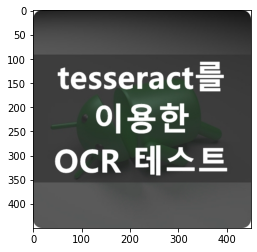

In [26]:
plt.imshow(img)

# # 영어 판독

In [27]:
imgchar = pytesseract.image_to_string(img, lang='eng')

In [28]:
print(imgchar)

tesseractS
0|2¢t
ole > | kaa



# # 한글 판독

In [29]:
imgchar2 = pytesseract.image_to_string(img, lang='kor')
print(imgchar2)

[슨튼솜튼『뭄섭[를
이 용 한
'0[ 익 : 샐 = 6 키 그



In [30]:
imgchar3 = pytesseract.image_to_string(img, lang='eng+kor')
print(imgchar2)

[슨튼솜튼『뭄섭[를
이 용 한
'0[ 익 : 샐 = 6 키 그



In [31]:
imgchar3 = pytesseract.image_to_string(img, lang='chi_sim')
print(imgchar3)

`丨:esse_'a(:t:昌
o| 号 联
OCR 印 之 万



# # 글자에 boxing

In [33]:
imgH, imgW, _ = img.shape

In [34]:
imgbox = pytesseract.image_to_boxes(img)
print(imgbox)

t 51 286 74 331 0
e 78 286 110 322 0
s 116 286 141 322 0
s 147 286 172 322 0
e 177 286 209 322 0
r 215 287 237 322 0
a 239 286 270 322 0
c 276 286 304 322 0
t 308 286 331 331 0
S 336 282 394 343 0
0 130 210 163 253 0
| 171 195 180 257 0
2 195 195 253 256 0
¢ 249 195 282 258 0
t 262 197 321 258 0
o 45 113 92 163 0
l 84 113 109 163 0
e 98 114 181 163 0
> 212 109 263 171 0
| 250 101 263 175 0
k 276 117 294 167 0
a 276 117 334 167 0
a 343 117 401 165 0



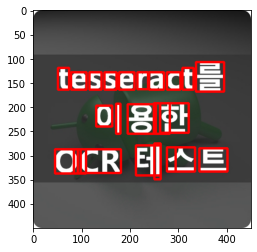

In [35]:
for boxes in imgbox.splitlines() :
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
    
    cv2.rectangle(img, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

plt.imshow(img)

# # video demo

In [15]:
import numpy as np

In [16]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [42]:
cap = cv2.VideoCapture('original_video.mp4')

if not cap.isOpened() :
    cap = VideoCapture(0)
    
if not cap.isOpened() :
    rasieIOError('Can not read video file...')

cntr = 0 
while True :
    _, frame = cap.read()
    cntr += 1
    
    if( (cntr%20) == 0 ) :
        
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0,0, imgH, imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines() :
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

        cv2.putText(frame, imgchar, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.imshow('Video dectection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q') :
            break
                
cap.release()       
cv2.destroyAllWindows()

# # webcam

In [28]:
cap = cv2.VideoCapture(1)

if not cap.isOpened() :
    cap = VideoCapture(0)
    
if not cap.isOpened() :
    rasieIOError('Can not read video file...')

cntr = 0 
while True :
    _, frame = cap.read()
    cntr += 1
    
    if( (cntr%24) == 0 ) :
        
        imgH, imgW, _ = frame.shape
        x1, y1, w1, h1 = 0,0, imgH, imgW
        imgchar = pytesseract.image_to_string(frame)
        imgboxes = pytesseract.image_to_boxes(frame)
        
        for boxes in imgboxes.splitlines() :
            boxes = boxes.split(' ')
            x,y,w,h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])
            cv2.rectangle(frame, (x, imgH - y), (w, imgH - h), (255, 0,0), 3)

        cv2.putText(frame, imgchar, (x1+int(w1/10), y1+int(h1/10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.imshow('Video dectection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q') :
            break
                
cap.release()       
cv2.destroyAllWindows()